
**Name:** Labib Kamran  
**CMS ID:** 467183  
**Section:** BSCS 13D

## Naive Bayes Theory and Hands-On Implementation

Load the Dataset

In [1]:
# Import libraries and prepare Iris dataset for classification
import sklearn.datasets as datasets
import sklearn.model_selection as model_selection
import sklearn.naive_bayes as nb
import sklearn.metrics as metrics

iris = datasets.load_iris()
features, labels = iris.data, iris.target
train_X, test_X, train_y, test_y = model_selection.train_test_split(
    features, labels, test_size=0.3, random_state=42
)

Train the Gaussian Naive Bayes Classifier

In [2]:
# Create and train Gaussian Naive Bayes model
gaussian_classifier = nb.GaussianNB()
gaussian_classifier.fit(train_X, train_y)

,priors,None
,var_smoothing,1e-09


Make Predictions and Evaluate the Model 

In [3]:
# Generate predictions and assess model performance
predictions = gaussian_classifier.predict(test_X)
acc_score = metrics.accuracy_score(test_y, predictions)
cm = metrics.confusion_matrix(test_y, predictions)

print("Accuracy:", acc_score)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9777777777777777
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


##  KNN Theory and Hands-On Implementation

Load and Split the Data

In [4]:
# Import required modules and load Iris dataset
from sklearn import datasets, model_selection, neighbors, metrics

iris_data = datasets.load_iris()
X_features, y_labels = iris_data.data, iris_data.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_features, y_labels, test_size=0.3, random_state=42
)

Initialize the KNN Classifier

In [5]:
# Build KNN model with 3 neighbors and fit to training data
knn_model = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Make Predictions and Evaluate the Model

In [6]:
# Predict test samples and evaluate KNN classifier
y_predictions = knn_model.predict(X_test)
model_accuracy = metrics.accuracy_score(y_test, y_predictions)
confusion_mat = metrics.confusion_matrix(y_test, y_predictions)

print("Accuracy:", model_accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


##  Comparing Naive Bayes and KNN Performance

Set Up the Data

In [7]:
# Load libraries and prepare Iris data for comparison
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

iris_dataset = load_iris()
X, y = iris_dataset.data, iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Train Naive Bayes

In [8]:
# Train Naive Bayes classifier and compute accuracy
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
nb_pred = naive_bayes.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.9777777777777777


Train KNN

In [9]:
# Build and evaluate KNN classifier with k=3
k_nearest = KNeighborsClassifier(n_neighbors=3)
k_nearest.fit(X_train, y_train)
knn_pred = k_nearest.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 1.0


Evaluating and Visualizing Results

Naive Bayes Accuracy: 0.9777777777777777
KNN Accuracy: 1.0


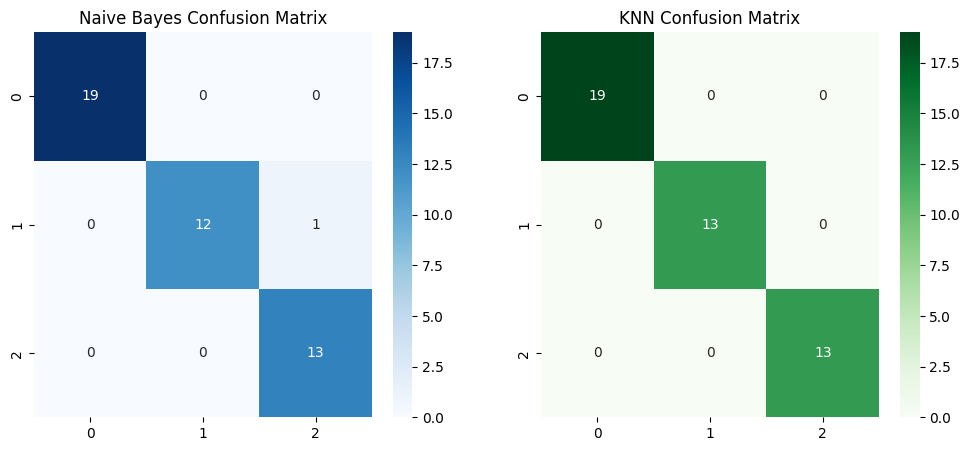

In [10]:
# Display accuracies and visualize confusion matrices side by side
import seaborn as sns
import matplotlib.pyplot as plt

print("Naive Bayes Accuracy:", nb_accuracy)
print("KNN Accuracy:", knn_accuracy)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt="d", ax=axes[0], cmap="Blues")
axes[0].set_title("Naive Bayes Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt="d", ax=axes[1], cmap="Greens")
axes[1].set_title("KNN Confusion Matrix")
plt.show()

##  Mini Challenge – Naïve Bayes vs KNN

Generating "Moon" dataset

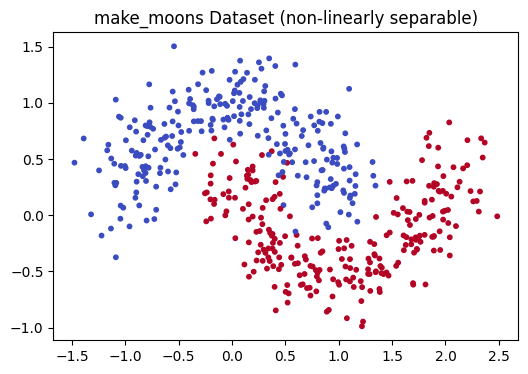

In [11]:
# Create moon-shaped dataset and visualize it
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)
plt.title("make_moons Dataset (non-linearly separable)")
plt.show()

Training and Evaluating Naive Bayes with GridSearchCV

Best Naive Bayes Parameters: {'var_smoothing': np.float64(1e-09)}
Naive Bayes Best Accuracy: 0.867


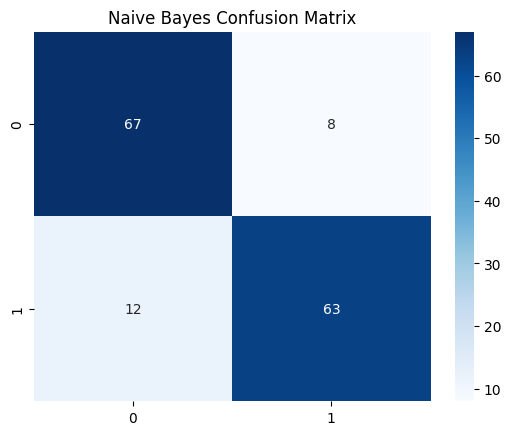

In [12]:
# Optimize Naive Bayes using GridSearchCV and display results
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nb_classifier = GaussianNB()
param_grid = {'var_smoothing': np.logspace(-9, -1, 9)}
grid_search_nb = GridSearchCV(nb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

nb_best = grid_search_nb.best_estimator_
nb_pred = nb_best.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

print("Best Naive Bayes Parameters:", grid_search_nb.best_params_)
print("Naive Bayes Best Accuracy:", round(nb_accuracy, 3))
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

Training and Evaluating KNN with GridSearchCV

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'uniform'}
KNN Best Accuracy: 0.98


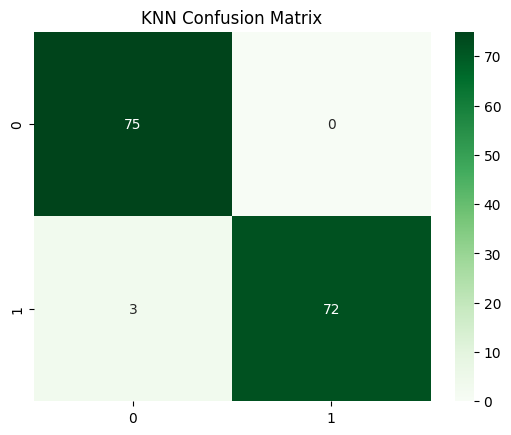

In [13]:
# Tune KNN hyperparameters and evaluate best model
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
hyperparameters = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search_knn = GridSearchCV(knn_classifier, hyperparameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

knn_best = grid_search_knn.best_estimator_
knn_pred = knn_best.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

print("Best KNN Parameters:", grid_search_knn.best_params_)
print("KNN Best Accuracy:", round(knn_accuracy, 3))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.show()

Decision Boundary Visualization

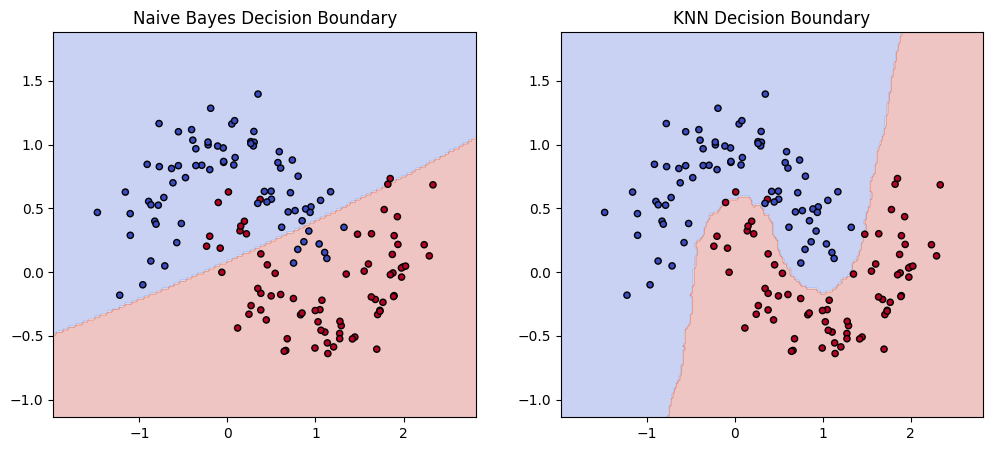

In [14]:
# Define function to plot decision boundaries and visualize both models
def plot_decision_boundary(model, X, y, ax, title):
    step_size = 0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20, edgecolor='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(nb_best, X_test, y_test, axes[0], "Naive Bayes Decision Boundary")
plot_decision_boundary(knn_best, X_test, y_test, axes[1], "KNN Decision Boundary")
plt.show()

So **Naive Bayes achieved 0.867 accuracy** as it assumes linear decision boundaries and independent features, causing misclassifications in regions where the two moon classes overlap. However, **KNN got 0.98 accuracy** by capturing the non-linear structure of the dataset.

Most Naive Bayes errors occurred near the curved boundary where class distributions overlap, while KNN misclassified only a few noisy points near the class edges.

Bonus: Voting Classifiers (Hard & Soft)

In [15]:
# Create voting classifiers and compare hard vs soft voting strategies
from sklearn.ensemble import VotingClassifier

hard_voter = VotingClassifier(estimators=[('nb', nb_best), ('knn', knn_best)], voting='hard')
soft_voter = VotingClassifier(estimators=[('nb', nb_best), ('knn', knn_best)], voting='soft')

hard_voter.fit(X_train, y_train)
soft_voter.fit(X_train, y_train)

hard_acc = accuracy_score(y_test, hard_voter.predict(X_test))
soft_acc = accuracy_score(y_test, soft_voter.predict(X_test))

print(f"Hard Voting Accuracy: {hard_acc:.3f}")
print(f"Soft Voting Accuracy: {soft_acc:.3f}")

Hard Voting Accuracy: 0.920
Soft Voting Accuracy: 0.980


Ensemble Decision Boundaries

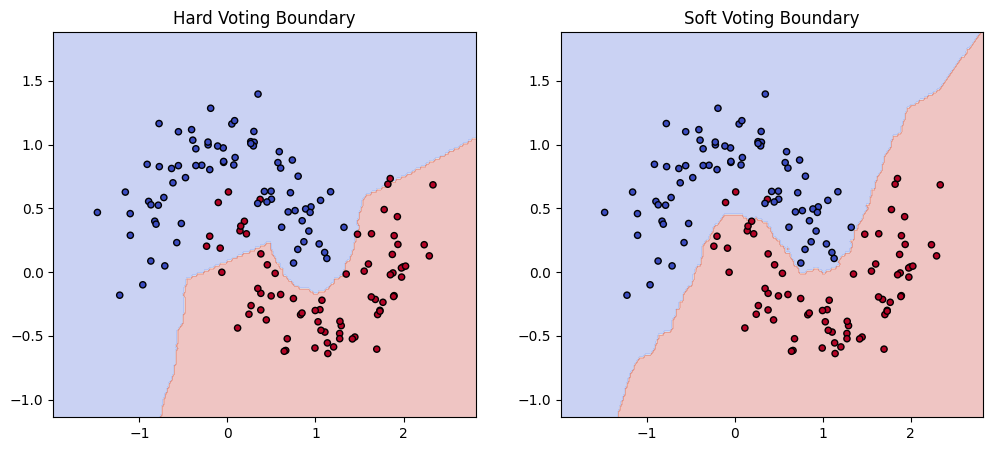

In [16]:
# Visualize decision boundaries for ensemble voting methods
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_decision_boundary(hard_voter, X_test, y_test, axes[0], "Hard Voting Boundary")
plot_decision_boundary(soft_voter, X_test, y_test, axes[1], "Soft Voting Boundary")
plt.show()

The ensemble models combine Naive Bayes and KNN to balance their strengths.  
- **Hard Voting (Accuracy: 0.92):** This predicts based on the majority class between the two models. Its decision boundary looks like the intersection of the NB and KNN boundaries. As a result, it smooths some Naive Bayes errors but still struggles in regions where the models strongly disagree, leading to a modest improvement.  
- **Soft Voting (Accuracy: 0.98):** This approach averages class probabilities from both models instead of taking a strict majority vote. The resulting decision rule blends both models’ confidence levels. It follows KNN’s curved regions where the data is highly non-linear, and NB’s simpler linear regions where classes are well separated. This produces a smoother, more adaptive boundary and matches the best individual model’s accuracy while improving stability.

Overall, this ensemble shows how voting schemes can use complementary strengths of NB’s probabilistic generalization and KNN’s local adaptability to make a classifier that generalizes better across a complex feature space.
